## Task: Table Booking and Online Delivery
Determine the percentage of restaurants that offer table booking and online delivery.
Compare the average ratings of restaurant swith table booking and those without.
Analyze the availability of online delivery among restaurants with different price ranges.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('Dataset .csv')

In [5]:
# Display the first few rows of the dataset
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [6]:
# Calculate the percentage of restaurants with table booking
table_booking_percentage = (df['Has Table booking'].value_counts(normalize=True) * 100).to_dict()

# Calculate the percentage of restaurants with online delivery
online_delivery_percentage = (df['Has Online delivery'].value_counts(normalize=True) * 100).to_dict()

print("Percentage of Restaurants with Table Booking:", table_booking_percentage)
print("Percentage of Restaurants with Online Delivery:", online_delivery_percentage)

Percentage of Restaurants with Table Booking: {'No': 87.87561511883573, 'Yes': 12.124384881164275}
Percentage of Restaurants with Online Delivery: {'No': 74.33776567898649, 'Yes': 25.662234321013504}


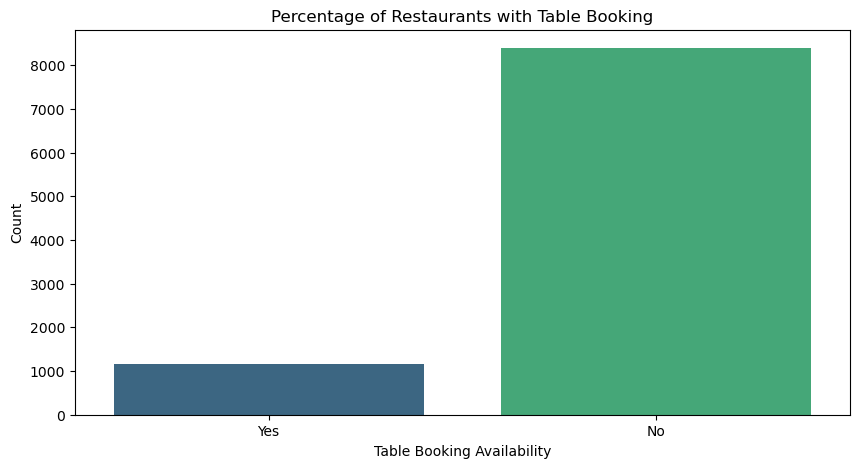

In [9]:
# Visualization 1: Percentage of Restaurants with Table Booking
plt.figure(figsize=(10, 5))
sns.countplot(x='Has Table booking', data=df, palette='viridis')
plt.title('Percentage of Restaurants with Table Booking')
plt.xlabel('Table Booking Availability')
plt.ylabel('Count')
plt.show()

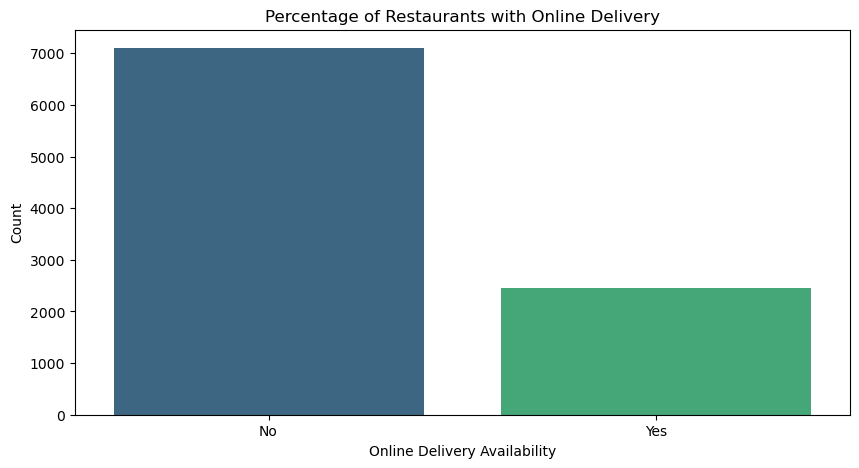

In [10]:
# Visualization 2: Percentage of Restaurants with Online Delivery
plt.figure(figsize=(10, 5))
sns.countplot(x='Has Online delivery', data=df, palette='viridis')
plt.title('Percentage of Restaurants with Online Delivery')
plt.xlabel('Online Delivery Availability')
plt.ylabel('Count')
plt.show()

In [7]:
# Divide the dataset into two groups: with and without table booking
with_table_booking = df[df['Has Table booking'] == 'Yes']
without_table_booking = df[df['Has Table booking'] == 'No']

# Calculate average ratings for each group
average_rating_with = with_table_booking['Aggregate rating'].mean()
average_rating_without = without_table_booking['Aggregate rating'].mean()

print("Average Rating with Table Booking:", average_rating_with)
print("Average Rating without Table Booking:", average_rating_without)

Average Rating with Table Booking: 3.4419689119170984
Average Rating without Table Booking: 2.559358989634219


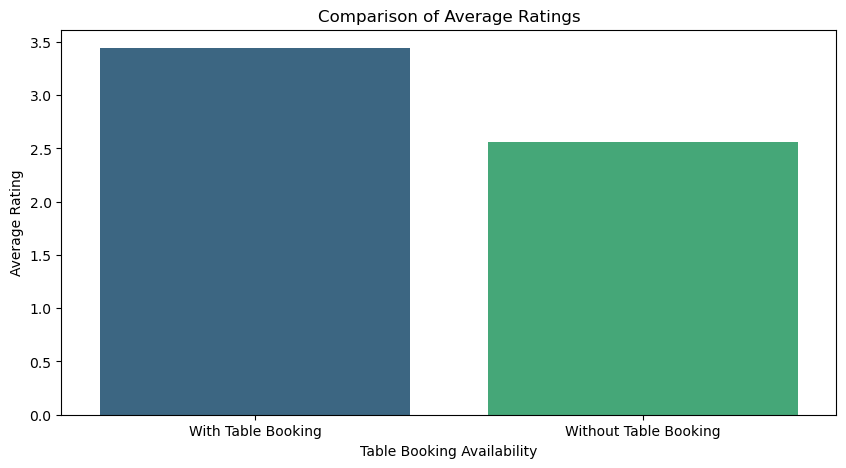

In [11]:
# Visualization 3: Comparison of Average Ratings
plt.figure(figsize=(10, 5))
sns.barplot(x=['With Table Booking', 'Without Table Booking'], y=[average_rating_with, average_rating_without], palette='viridis')
plt.title('Comparison of Average Ratings')
plt.xlabel('Table Booking Availability')
plt.ylabel('Average Rating')
plt.show()

In [8]:
# Create bins for different price ranges
price_bins = [0, 2, 3, 4]
price_labels = ['Low', 'Medium', 'High']

# Categorize restaurants into price ranges
df['Price Range Category'] = pd.cut(df['Price range'], bins=price_bins, labels=price_labels)

# Calculate the percentage of restaurants with online delivery in each price range
online_delivery_by_price = df.groupby('Price Range Category')['Has Online delivery'].value_counts(normalize=True) * 100

print("Online Delivery Availability by Price Range:")
print(online_delivery_by_price)

Online Delivery Availability by Price Range:
Price Range Category  Has Online delivery
Low                   No                     73.706497
                      Yes                    26.293503
Medium                No                     70.809659
                      Yes                    29.190341
High                  No                     90.955631
                      Yes                     9.044369
Name: Has Online delivery, dtype: float64


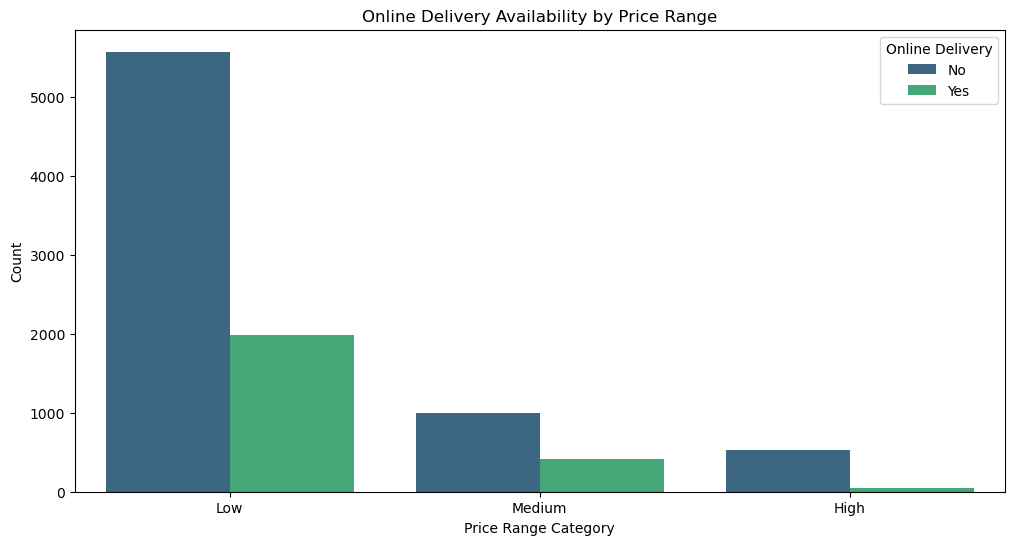

In [12]:
# Visualization 4: Online Delivery Availability by Price Range
plt.figure(figsize=(12, 6))
sns.countplot(x='Price Range Category', hue='Has Online delivery', data=df, palette='viridis')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range Category')
plt.ylabel('Count')
plt.legend(title='Online Delivery')
plt.show()